In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as  np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.layers import InputLayer,Dense,Conv2D,Dropout,MaxPool2D,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [6]:
total_datagen=ImageDataGenerator(rescale=1/255,
                                 zoom_range=0.1,
                                 horizontal_flip=True,
                                 rotation_range=10,
                                 brightness_range=[0.9,1.1])


train_datagen=total_datagen.flow_from_directory(directory="/kaggle/input/chest-xray-covid19-pneumonia/Data/train",
                                               target_size=(224,224),
                                               color_mode="rgb",
                                               class_mode="categorical",
                                               batch_size=32,
                                                shuffle=True)

Found 5144 images belonging to 3 classes.


In [4]:
total_test_data_gen=ImageDataGenerator(rescale=1/255)
test_data_gen=total_test_data_gen.flow_from_directory(directory="/kaggle/input/chest-xray-covid19-pneumonia/Data/test",
                                                     target_size=(224,224),
                                                      color_mode="rgb",
                                                      class_mode="categorical",
                                                      batch_size=32,
                                                      shuffle=True
                                                     )

Found 1288 images belonging to 3 classes.


In [5]:
train_img,train_labels=next(train_datagen)
test_img,test_labels=next(test_data_gen)

In [14]:
from tensorflow.keras.layers import InputLayer,Dense,Conv2D,Dropout,MaxPool2D,Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
model=tf.keras.models.Sequential([
    Conv2D(filters=64,kernel_size=(3,3),input_shape=[224,224,3]),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=128,kernel_size=(3,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=256,kernel_size=(3,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=256,kernel_size=(3,3)),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=128,activation="relu"),
    Dropout(0.2),
    Dense(units=64,activation="relu"),
    Dropout(0.2),
    Dense(units=3,activation="sigmoid"),
])


earlystopping=EarlyStopping(patience=10,restore_best_weights=True)



model.compile(loss="binary_crossentropy",optimizer='adam',metrics=["accuracy"])

history=model.fit(train_img,train_labels,epochs=100,callbacks=[earlystopping],validation_data=[test_img,test_labels],validation_split=0.33,batch_size=10)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.2883 - loss: 1.6088 - val_accuracy: 0.2188 - val_loss: 2.6750
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4717 - loss: 1.8043 - val_accuracy: 0.1562 - val_loss: 1.8965
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4242 - loss: 2.0700 - val_accuracy: 0.7500 - val_loss: 3.7288
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6083 - loss: 3.1481 - val_accuracy: 0.7500 - val_loss: 1.3860
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5267 - loss: 2.3164 - val_accuracy: 0.7500 - val_loss: 0.6539
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7067 - loss: 0.8971 - val_accuracy: 0.2188 - val_loss: 1.6427
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4900 - loss: 0.9998 - val_accuracy: 0.7500 - val_loss: 1.2684
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6742 - loss: 1.0916 - val_accuracy: 0.7500 - val_loss: 0.5046
Epoch 

In [15]:
y_pred=model.predict(test_img)
actual=(test_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
from tensorflow.keras.metrics import CategoricalCrossentropy

actual_data = tf.cast(actual_data, tf.float32)
predicted_data = tf.cast(predicted_data, tf.float32)

metric = CategoricalCrossentropy()
metric.update_state(actual_data, predicted_data)
print("Categorical Crossentropy:", metric.result().numpy())


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

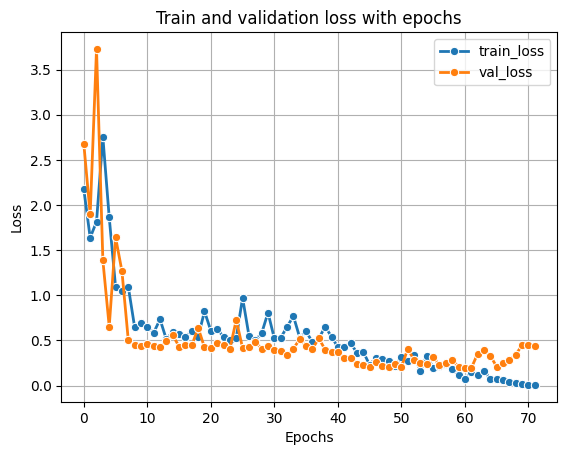

In [18]:
import seaborn as sns

sns.lineplot(history.history["loss"],label="train_loss",marker="o",linewidth=2)
sns.lineplot(history.history["val_loss"],label="val_loss",marker="o",linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and validation loss with epochs")
plt.grid(True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

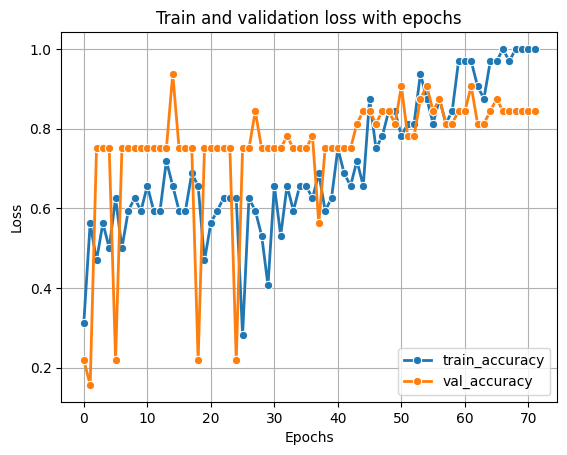

In [19]:
sns.lineplot(history.history["accuracy"],label="train_accuracy",marker="o",linewidth=2)
sns.lineplot(history.history["val_accuracy"],label="val_accuracy",marker="o",linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and validation loss with epochs")
plt.grid(True)

In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

vgg_model=VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))

In [11]:
vgg_model=Sequential([
    vgg_model,
    Flatten(),
    Dense(256,activation="relu"),
    Dropout(0.2),
    Dense(3,activation="sigmoid")
])


optimizer_vgg=Adam(learning_rate=0.0001)
earlystopping_vgg=EarlyStopping(patience=10,restore_best_weights=True)
vgg_model.compile(loss="binary_crossentropy",optimizer=optimizer_vgg,metrics=["accuracy"])
vgg_history=vgg_model.fit(train_img,train_labels,validation_data=[test_img,test_labels],callbacks=[earlystopping_vgg],epochs=100,validation_split=0.33,batch_size=10)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 49s 10s/step - accuracy: 0.0875 - loss: 0.6810 - val_accuracy: 0.3750 - val_loss: 0.6602
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 10s/step - accuracy: 0.1100 - loss: 0.6720 - val_accuracy: 0.3750 - val_loss: 0.6585
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - accuracy: 0.0675 - loss: 0.6735 - val_accuracy: 0.3750 - val_loss: 0.6594
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 10s/step - accuracy: 0.3200 - loss: 0.6636 - val_accuracy: 0.3750 - val_loss: 0.6567
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 10s/step - accuracy: 0.4017 - loss: 0.6561 - val_accuracy: 0.3750 - val_loss: 0.6529
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 11s/step - accuracy: 0.4633 - loss: 0.6557 - val_accuracy: 0.5312 - val_loss: 0.6508
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - accuracy: 0.5875 - loss: 0.6466 - val_accuracy: 0.5312 - val_loss: 0.6502
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 10s/step - accuracy: 0.5800 - loss: 0.6467 - val_accuracy: 0.5312 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Categorical Crossentropy: 1.0021889


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

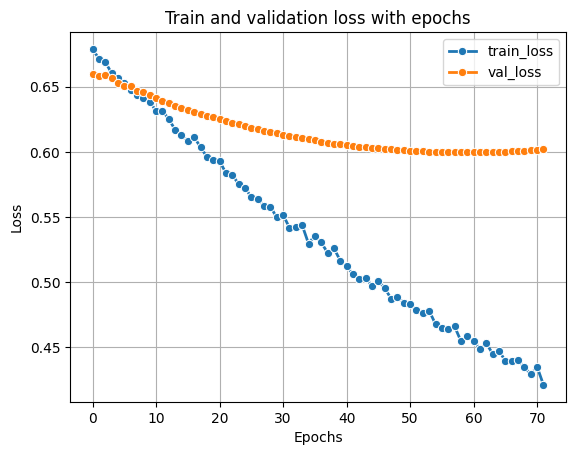

In [15]:
y_pred_vgg=vgg_model.predict(test_img)
actual_vgg=(test_labels)
from tensorflow.keras.metrics import CategoricalCrossentropy

actual_data_vgg = tf.cast(actual_vgg, tf.float32)
predicted_data_vgg = tf.cast(y_pred_vgg, tf.float32)

metric = CategoricalCrossentropy()
metric.update_state(actual_data_vgg, predicted_data_vgg)
print("Categorical Crossentropy:", metric.result().numpy())
import seaborn as sns

sns.lineplot(vgg_history.history["loss"],label="train_loss",marker="o",linewidth=2)
sns.lineplot(vgg_history.history["val_loss"],label="val_loss",marker="o",linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and validation loss with epochs")
plt.grid(True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

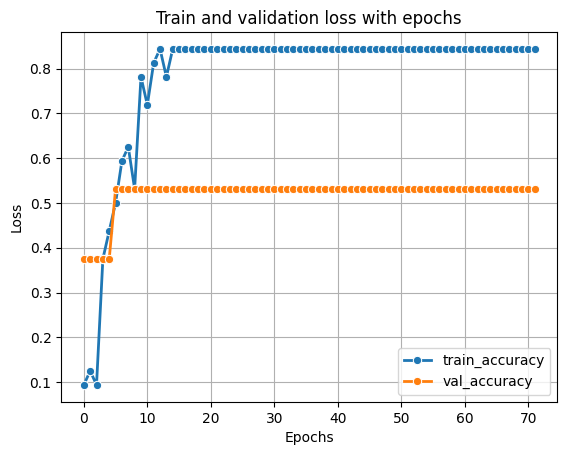

In [16]:
sns.lineplot(vgg_history.history["accuracy"],label="train_accuracy",marker="o",linewidth=2)
sns.lineplot(vgg_history.history["val_accuracy"],label="val_accuracy",marker="o",linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and validation loss with epochs")
plt.grid(True)

In [7]:
#xception_model
xception_train_image=total_datagen.flow_from_directory(directory="/kaggle/input/chest-xray-covid19-pneumonia/Data/train",
                                                      shuffle=True,
                                                      batch_size=32,
                                                     target_size=(299,299),
                                                     color_mode="rgb",
                                                    class_mode="categorical"
                                                    )


xception_test_image=total_datagen.flow_from_directory(directory="/kaggle/input/chest-xray-covid19-pneumonia/Data/test",
                                                      shuffle=True,
                                                      batch_size=32,
                                                     target_size=(299,299),
                                                     color_mode="rgb",
                                                    class_mode="categorical"
                                                    )


Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [8]:
xception_train,xception_train_labels=next(xception_train_image)
xception_test,xception_test_labels=next(xception_test_image)

In [11]:
from tensorflow.keras.applications import Xception
xception_model=Xception(weights="imagenet",include_top=False,input_shape=(299,299,3))
xception=Sequential([
    xception_model,
    
    Flatten(),
    Dense(256,activation="relu"),
    Dropout(0.2),
    Dense(3,activation="sigmoid")
    
])

optimizer_xception=Adam(learning_rate=0.0001)
earlystopping_xception=EarlyStopping(patience=10,restore_best_weights=True)
xception.compile(loss="binary_crossentropy",optimizer=optimizer_xception,metrics=["accuracy"])
xception_history=xception.fit(xception_train,xception_train_labels,validation_data=[xception_test,xception_test_labels],callbacks=[earlystopping_xception],epochs=100,batch_size=10)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 80s 9s/step - accuracy: 0.4558 - loss: 1.0460 - val_accuracy: 0.7812 - val_loss: 0.6314
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 8s/step - accuracy: 0.8633 - loss: 0.3126 - val_accuracy: 0.7500 - val_loss: 0.9665
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 8s/step - accuracy: 0.9875 - loss: 0.0817 - val_accuracy: 0.8125 - val_loss: 0.8142
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 9s/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.8125 - val_loss: 0.8705
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 46s 9s/step - accuracy: 1.0000 - loss: 0.0244 - val_accuracy: 0.8125 - val_loss: 0.8550
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 8s/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 0.7812 - val_loss: 0.7862
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 9s/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 0.7812 - val_loss: 0.7652
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 8s/step - accuracy: 1.0000 - loss: 0.0525 - val_accuracy: 0.8125 - val_loss: 0.8236


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Categorical Crossentropy: 1.1024779


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

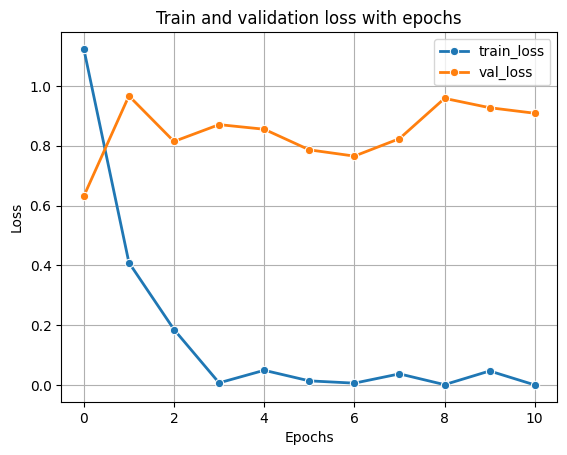

In [14]:
y_pred_xception=xception.predict(xception_test)
actual_xception=(xception_test_labels)
from tensorflow.keras.metrics import CategoricalCrossentropy

actual_data_xception = tf.cast(actual_xception, tf.float32)
predicted_data_xception = tf.cast(y_pred_xception, tf.float32)

metric = CategoricalCrossentropy()
metric.update_state(actual_data_xception, predicted_data_xception)
print("Categorical Crossentropy:", metric.result().numpy())
import seaborn as sns

sns.lineplot(xception_history.history["loss"],label="train_loss",marker="o",linewidth=2)
sns.lineplot(xception_history.history["val_loss"],label="val_loss",marker="o",linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and validation loss with epochs")
plt.grid(True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

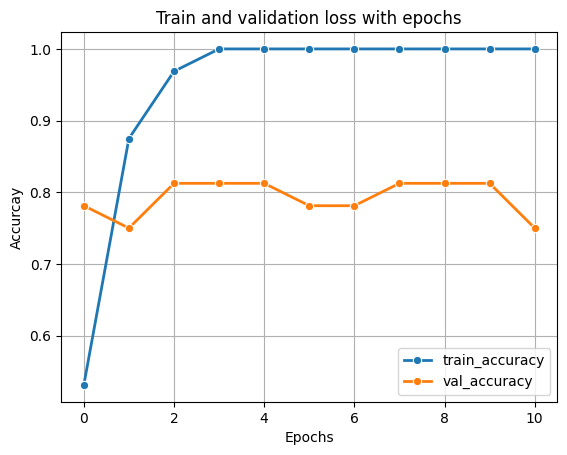

In [16]:
sns.lineplot(xception_history.history["accuracy"],label="train_accuracy",marker="o",linewidth=2)
sns.lineplot(xception_history.history["val_accuracy"],label="val_accuracy",marker="o",linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Accurcay")
plt.title("Train and validation loss with epochs")
plt.grid(True)